In [30]:
#!pip install git+https://github.com/JoaquinAmatRodrigo/skforecast#master --upgrade
%load_ext autoreload
%autoreload 2
import sys
sys.path.insert(1, '/home/ximo/Documents/GitHub/skforecast')
%config Completer.use_jedi = False

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Autoregressive forecaster

In [66]:
# Libraries
# ==============================================================================
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from skforecast.ForecasterAutoreg import ForecasterAutoreg
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

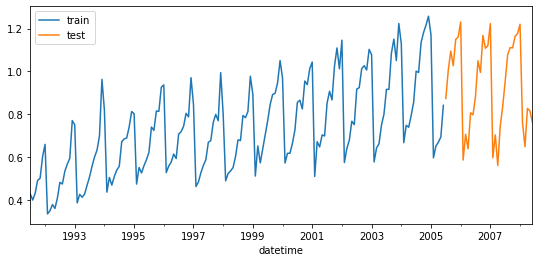

In [67]:
# Download data
# ==============================================================================
url = ('https://raw.githubusercontent.com/JoaquinAmatRodrigo/skforecast/master/data/h2o.csv')
data = pd.read_csv(url, sep=',', header=0, names=['y', 'datetime'])

# Data preprocessing
# ==============================================================================
data['datetime'] = pd.to_datetime(data['datetime'], format='%Y/%m/%d')
data = data.set_index('datetime')
data = data.asfreq('MS')
data = data['y']
data = data.sort_index()

# Split train-test
# ==============================================================================
steps = 36
data_train = data[:-steps]
data_test  = data[-steps:]

# Plot
# ==============================================================================
fig, ax = plt.subplots(figsize=(9, 4))
data_train.plot(ax=ax, label='train')
data_test.plot(ax=ax, label='test')
ax.legend();

In [71]:
# Create and fit forecaster
# ==============================================================================
forecaster = ForecasterAutoreg(
                regressor = RandomForestRegressor(random_state=123),
                lags      = 15
             )

forecaster.fit(y=data_train)
forecaster

ForecasterAutoreg 
Regressor: RandomForestRegressor(random_state=123) 
Lags: [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15] 
Window size: 15 
Included exogenous: False 
Type of exogenous variable: None 
Exogenous variables names: None 
Training range: [Timestamp('1991-07-01 00:00:00'), Timestamp('2005-06-01 00:00:00')] 
Training index type: DatetimeIndex 
Training index frequency: MS 
Regressor parameters: {'bootstrap': True, 'ccp_alpha': 0.0, 'criterion': 'squared_error', 'max_depth': None, 'max_features': 'auto', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': 123, 'verbose': 0, 'warm_start': False} 
Creation date: 2021-12-08 18:21:27 
Last fit date: 2021-12-08 18:21:27 
Skforecast version: 0.4.0 

In [72]:
# Predict
# ==============================================================================
predictions = forecaster.predict(steps=36)
predictions.head(3)

2005-07-01    0.921840
2005-08-01    0.954921
2005-09-01    1.101716
Freq: MS, Name: pred, dtype: float64

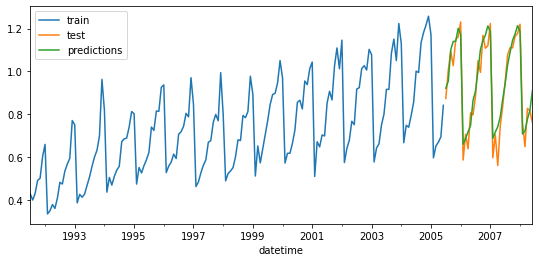

In [73]:
# Plot predictions
# ==============================================================================
fig, ax = plt.subplots(figsize=(9, 4))
data_train.plot(ax=ax, label='train')
data_test.plot(ax=ax, label='test')
predictions.plot(ax=ax, label='predictions')
ax.legend();

In [74]:
# Prediction error
# ==============================================================================
error_mse = mean_squared_error(
                y_true = data_test,
                y_pred = predictions
            )
print(f"Test error (mse): {error_mse}")

Test error (mse): 0.00429855684785846


In [75]:
# Feature importance
# ==============================================================================
forecaster.get_feature_importance()

print(forecaster.get_feature_importance().to_markdown(index=False, tablefmt='github'))

| feature   |   importance |
|-----------|--------------|
| lag_1     |   0.0123397  |
| lag_2     |   0.0851603  |
| lag_3     |   0.0134071  |
| lag_4     |   0.00437446 |
| lag_5     |   0.00318805 |
| lag_6     |   0.00343593 |
| lag_7     |   0.00313612 |
| lag_8     |   0.00714094 |
| lag_9     |   0.00783053 |
| lag_10    |   0.0127507  |
| lag_11    |   0.00901919 |
| lag_12    |   0.807098   |
| lag_13    |   0.00481128 |
| lag_14    |   0.0163282  |
| lag_15    |   0.0099792  |


# Autoregressive forecaster with exogenous predictor

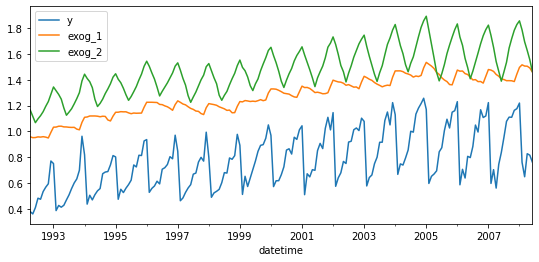

In [77]:
# Download data
# ==============================================================================
url = ('https://raw.githubusercontent.com/JoaquinAmatRodrigo/skforecast/master/data/h2o_exog.csv')
data = pd.read_csv(url, sep=',', header=0, names=['datetime', 'y', 'exog_1', 'exog_2'])

# Data preprocessing
# ==============================================================================
data['datetime'] = pd.to_datetime(data['datetime'], format='%Y/%m/%d')
data = data.set_index('datetime')
data = data.asfreq('MS')
data = data.sort_index()

# Plot
# ==============================================================================
fig, ax=plt.subplots(figsize=(9, 4))
data.plot(ax=ax);

In [79]:
# Split train-test
# ==============================================================================
steps = 36
data_train = data.iloc[:-steps, :]
data_test  = data.iloc[-steps:, :]

In [80]:
# Create and fit forecaster
# ==============================================================================
forecaster = ForecasterAutoreg(
                regressor = RandomForestRegressor(random_state=123),
                lags      = 15
             )

forecaster.fit(
    y    = data_train['y'],
    exog = data_train[['exog_1', 'exog_2']]
)

forecaster

ForecasterAutoreg 
Regressor: RandomForestRegressor(random_state=123) 
Lags: [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15] 
Window size: 15 
Included exogenous: True 
Type of exogenous variable: <class 'pandas.core.frame.DataFrame'> 
Exogenous variables names: ['exog_1', 'exog_2'] 
Training range: [Timestamp('1992-04-01 00:00:00'), Timestamp('2005-06-01 00:00:00')] 
Training index type: DatetimeIndex 
Training index frequency: MS 
Regressor parameters: {'bootstrap': True, 'ccp_alpha': 0.0, 'criterion': 'squared_error', 'max_depth': None, 'max_features': 'auto', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': 123, 'verbose': 0, 'warm_start': False} 
Creation date: 2021-12-08 18:26:10 
Last fit date: 2021-12-08 18:26:10 
Skforecast version: 0.4.0 

In [82]:
# Predict
# ==============================================================================
predictions = forecaster.predict(steps=36, exog=data_test[['exog_1', 'exog_2']])
predictions.head(3)

2005-07-01    0.908832
2005-08-01    0.953925
2005-09-01    1.100887
Freq: MS, Name: pred, dtype: float64

In [83]:
# Feature importance
# ==============================================================================
forecaster.get_feature_importance()

print(forecaster.get_feature_importance().to_markdown(index=False, tablefmt='github'))

| feature   |   importance |
|-----------|--------------|
| lag_1     |   0.0133541  |
| lag_2     |   0.0611202  |
| lag_3     |   0.00908617 |
| lag_4     |   0.00272094 |
| lag_5     |   0.00247847 |
| lag_6     |   0.00315493 |
| lag_7     |   0.00217887 |
| lag_8     |   0.00815443 |
| lag_9     |   0.0103189  |
| lag_10    |   0.0205869  |
| lag_11    |   0.00703555 |
| lag_12    |   0.773389   |
| lag_13    |   0.00458297 |
| lag_14    |   0.0181272  |
| lag_15    |   0.00873237 |
| exog_1    |   0.0103638  |
| exog_2    |   0.0446156  |


# Autoregressive forecaster with custom predictors

In [85]:
# Libraries
# ==============================================================================
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from skforecast.ForecasterAutoregCustom import ForecasterAutoregCustom
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

In [89]:
# Download data
# ==============================================================================
url = ('https://raw.githubusercontent.com/JoaquinAmatRodrigo/skforecast/master/data/h2o.csv')
data = pd.read_csv(url, sep=',', header=0, names=['y', 'datetime'])

# Data preprocessing
# ==============================================================================
data['datetime'] = pd.to_datetime(data['datetime'], format='%Y/%m/%d')
data = data.set_index('datetime')
data = data.asfreq('MS')
data = data['y']
data = data.sort_index()

# Split train-test
# ==============================================================================
steps = 36
data_train = data[:-steps]
data_test  = data[-steps:]

In [90]:
def create_predictors(y):
    '''
    Create first 10 lags of a time series.
    Calculate moving average with window 20.
    '''
    
    X_train = pd.DataFrame({'y':y.copy()})
    for i in range(0, 10):
        X_train[f'lag_{i+1}'] = X_train['y'].shift(i)
        
    X_train['moving_avg'] = X_train['y'].rolling(20).mean()
    
    X_train = X_train.drop(columns='y').tail(1).to_numpy()  
    
    return X_train 

In [91]:
# Create and fit forecaster
# ==============================================================================
forecaster = ForecasterAutoregCustom(
                    regressor      = RandomForestRegressor(random_state=123),
                    fun_predictors = create_predictors,
                    window_size    = 20
                )

forecaster.fit(y=data_train)
forecaster

ForecasterAutoregCustom 
Regressor: RandomForestRegressor(random_state=123) 
Predictors created with function: create_predictors 
Window size: 20 
Included exogenous: False 
Type of exogenous variable: None 
Exogenous variables names: None 
Training range: [Timestamp('1991-07-01 00:00:00'), Timestamp('2005-06-01 00:00:00')] 
Training index type: DatetimeIndex 
Training index frequency: MS 
Regressor parameters: {'bootstrap': True, 'ccp_alpha': 0.0, 'criterion': 'squared_error', 'max_depth': None, 'max_features': 'auto', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': 123, 'verbose': 0, 'warm_start': False} 
Creation date: 2021-12-08 18:37:36 
Last fit date: 2021-12-08 18:37:37 
Skforecast version: 0.4.0 

In [92]:
# Predict
# ==============================================================================
predictions = forecaster.predict(steps=36)
predictions.head(3)

2005-07-01    0.926598
2005-08-01    0.948202
2005-09-01    1.020947
Freq: MS, Name: pred, dtype: float64

In [93]:
# Feature importance
# ==============================================================================
forecaster.get_feature_importance()

print(forecaster.get_feature_importance().to_markdown(index=False, tablefmt='github'))

| feature             |   importance |
|---------------------|--------------|
| custom_predictor_0  |    0.53972   |
| custom_predictor_1  |    0.119097  |
| custom_predictor_2  |    0.0464036 |
| custom_predictor_3  |    0.0241653 |
| custom_predictor_4  |    0.0305667 |
| custom_predictor_5  |    0.0151391 |
| custom_predictor_6  |    0.0428832 |
| custom_predictor_7  |    0.012742  |
| custom_predictor_8  |    0.018938  |
| custom_predictor_9  |    0.108639  |
| custom_predictor_10 |    0.0417066 |


## Prediction intervals

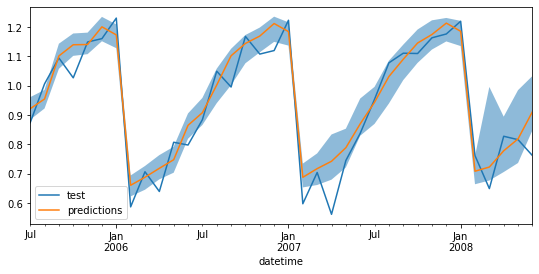

In [39]:
# Prediction intervals
# ==============================================================================
predictions = forecaster.predict_interval(
                    steps    = steps,
                    interval = [5, 95],
                    n_boot   = 250
              )


fig, ax=plt.subplots(figsize=(9, 4))
data_test.plot(ax=ax, label='test')
predictions['pred'].plot(ax=ax, label='predictions')
ax.fill_between(
    predictions.index,
    predictions['lower_bound'],
    predictions['upper_bound'],
    alpha=0.5
)
ax.legend();

## GridSearch

In [10]:
# Grid search hyperparameters and lags
# ==============================================================================
forecaster = ForecasterAutoreg(
                regressor = RandomForestRegressor(random_state=123),
                lags      = 12
             )

# Regressor hyperparameters
param_grid = {'n_estimators': [50, 100],
              'max_depth': [3, 5, 10]}

# Lags used as predictors
lags_grid = [3, 10, [1, 2, 3, 20]]

results_grid = grid_search_forecaster(
                        forecaster  = forecaster,
                        y           = data_train,
                        param_grid  = param_grid,
                        lags_grid   = lags_grid,
                        steps       = 10,
                        refit       = True,
                        metric      = 'mean_squared_error',
                        initial_train_size = int(len(data_train)*0.5),
                        return_best = True,
                        verbose     = False
                    )

Number of models compared: 18


loop lags_grid: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:18<00:00,  6.05s/it]

Refitting `forecaster` using the best found parameters and the whole data set: 
  lags: [ 1  2  3  4  5  6  7  8  9 10] 
  params: {'max_depth': 10, 'n_estimators': 50}



,lags,params,metric,max_depth,n_estimators
10,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]","{'max_depth': 10, 'n_estimators': 50}",0.025844,10,50
8,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]","{'max_depth': 5, 'n_estimators': 50}",0.026168,5,50
11,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]","{'max_depth': 10, 'n_estimators': 100}",0.027298,10,100
9,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]","{'max_depth': 5, 'n_estimators': 100}",0.027821,5,100
17,"[1, 2, 3, 20]","{'max_depth': 10, 'n_estimators': 100}",0.028311,10,100
6,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]","{'max_depth': 3, 'n_estimators': 50}",0.028434,3,50
7,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]","{'max_depth': 3, 'n_estimators': 100}",0.028885,3,100
13,"[1, 2, 3, 20]","{'max_depth': 3, 'n_estimators': 100}",0.030828,3,100
2,"[1, 2, 3]","{'max_depth': 5, 'n_estimators': 50}",0.031755,5,50
15,"[1, 2, 3, 20]","{'max_depth': 5, 'n_estimators': 100}",0.032458,5,100


In [11]:
print(results_grid.to_markdown(index=False, tablefmt='github'))

| lags                            | params                                 |    metric |   max_depth |   n_estimators |
|---------------------------------|----------------------------------------|-----------|-------------|----------------|
| [ 1  2  3  4  5  6  7  8  9 10] | {'max_depth': 10, 'n_estimators': 50}  | 0.0258444 |          10 |             50 |
| [ 1  2  3  4  5  6  7  8  9 10] | {'max_depth': 5, 'n_estimators': 50}   | 0.026168  |           5 |             50 |
| [ 1  2  3  4  5  6  7  8  9 10] | {'max_depth': 10, 'n_estimators': 100} | 0.0272982 |          10 |            100 |
| [ 1  2  3  4  5  6  7  8  9 10] | {'max_depth': 5, 'n_estimators': 100}  | 0.0278213 |           5 |            100 |
| [ 1  2  3 20]                   | {'max_depth': 10, 'n_estimators': 100} | 0.0283109 |          10 |            100 |
| [ 1  2  3  4  5  6  7  8  9 10] | {'max_depth': 3, 'n_estimators': 50}   | 0.0284343 |           3 |             50 |
| [ 1  2  3  4  5  6  7  8  9 10] | {'ma